In [1]:
import pandas as p
import matplotlib.pyplot as plt

In [19]:
df = p.read_csv("data/electricityConsumptionAndProductioction.csv")
df.head(10)

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
DateTime,,,,,,,,,
2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30
2019-01-01 05:00:00,5525,5385,1395,91,958,1455,1456,0,30
2019-01-01 06:00:00,5513,5349,1392,98,938,1451,1440,0,31
2019-01-01 07:00:00,5524,5547,1392,93,1187,1446,1394,0,34
2019-01-01 08:00:00,5510,5471,1391,51,1325,1357,1303,8,34


In [9]:
plt.figure(figsize=(10, 12))

df.plot(y='Consumption', label='Data')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Data Visualization')

# Add a legend
plt.legend()

# Show the plot
plt.show()

SingleBlockManager
Items: RangeIndex(start=0, stop=36772, step=1)
ObjectBlock: 36772 dtype: object

<Figure size 720x864 with 0 Axes>

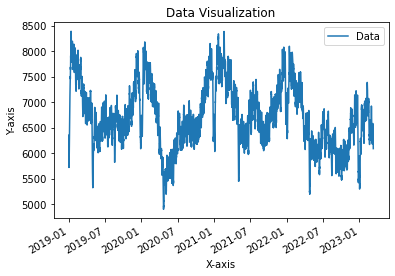

In [29]:
total_consumption = df['Consumption'].sum()
total_production = df['Production'].sum()
total_production_1 = df[['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']].sum().sum()

print(f"Total Consumption: {total_consumption} kWh")
print(f"Total Production (Production column): {total_production} kWh")
print(f"Total Production (sum of energy columns): {total_production_1} kWh")

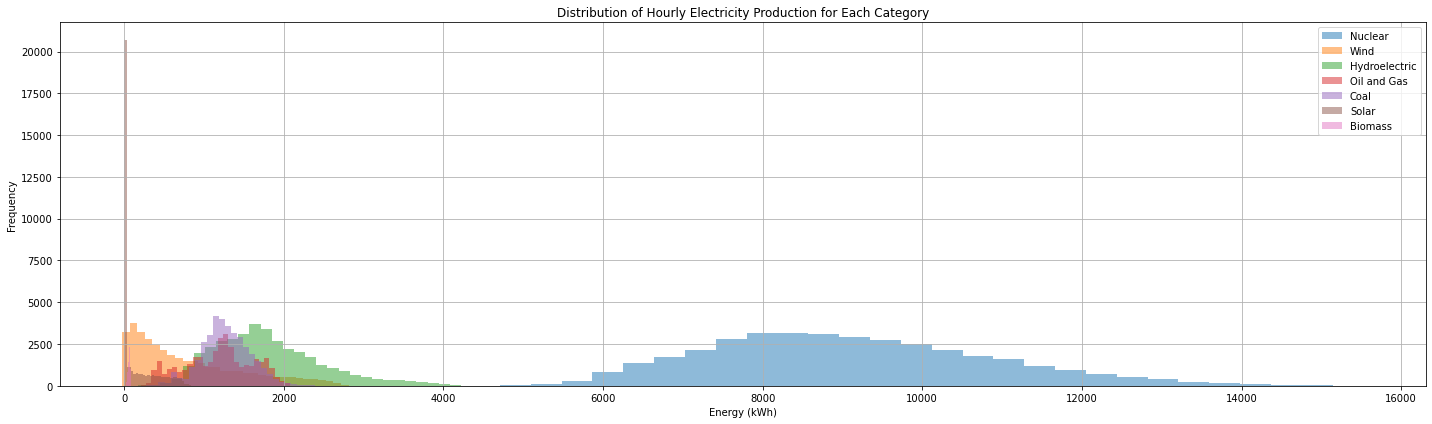

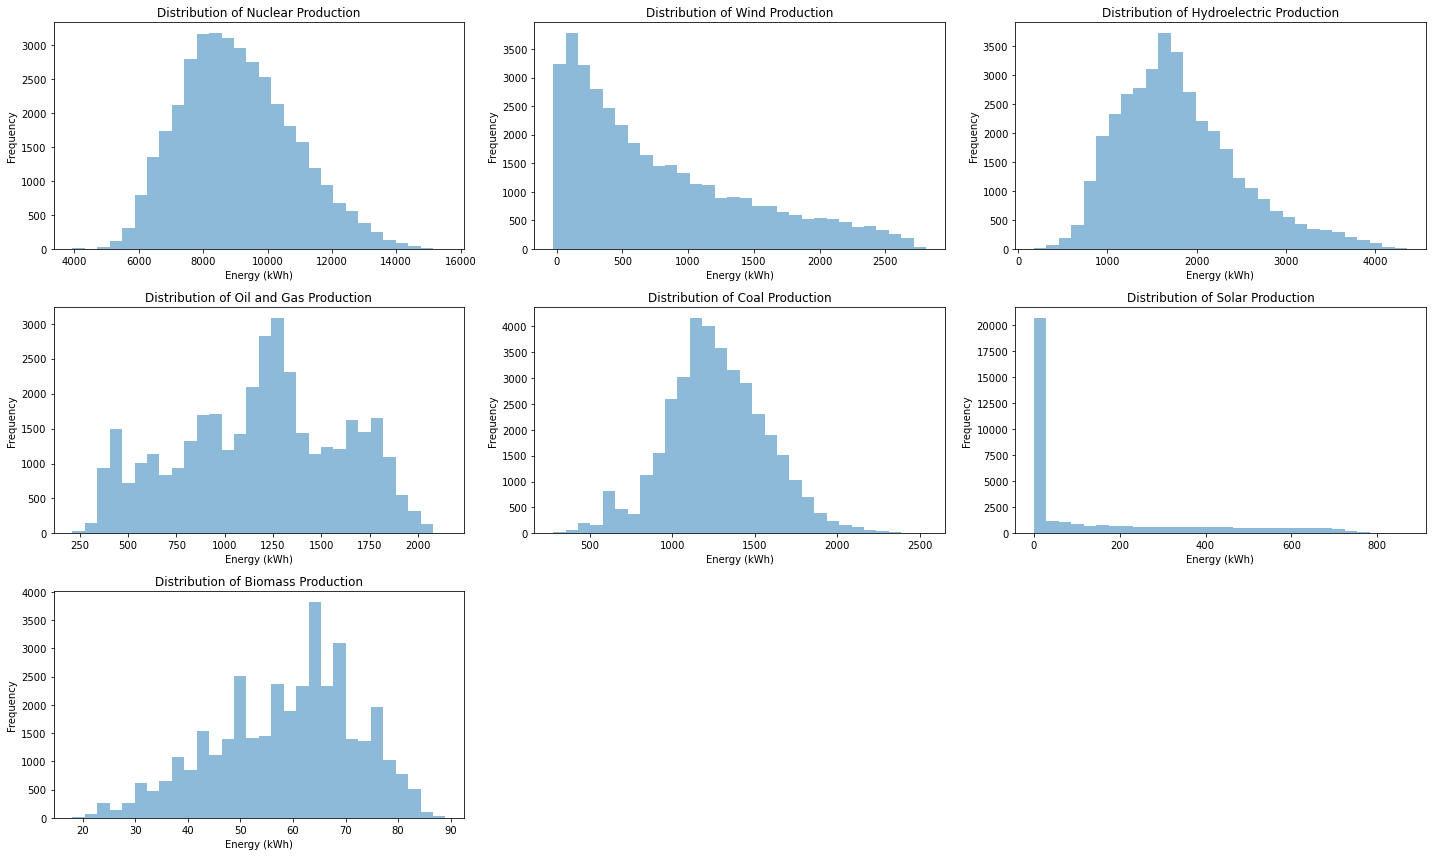

In [59]:

plt.figure(figsize=(20, 6))

production_categories = ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']

for category in production_categories:
    plt.hist(df[category].dropna(), bins=30, alpha=0.5, label=category)

plt.xlabel('Energy (kWh)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Hourly Electricity Production for Each Category')
plt.grid(True)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(20, 12))

for i, category in enumerate(production_categories):
    ax = fig.add_subplot(3, 3, i + 1)
    ax.hist(df[category].dropna(), bins=30, alpha=0.5)
    
    ax.set_xlabel('Energy (kWh)')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {category} Production')
    
plt.tight_layout()
plt.show()


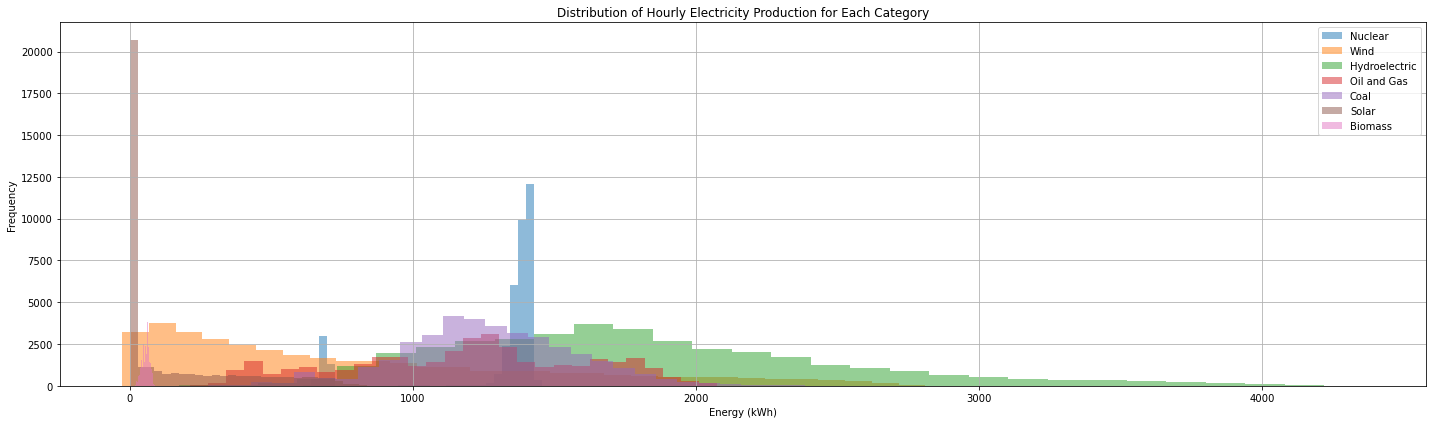

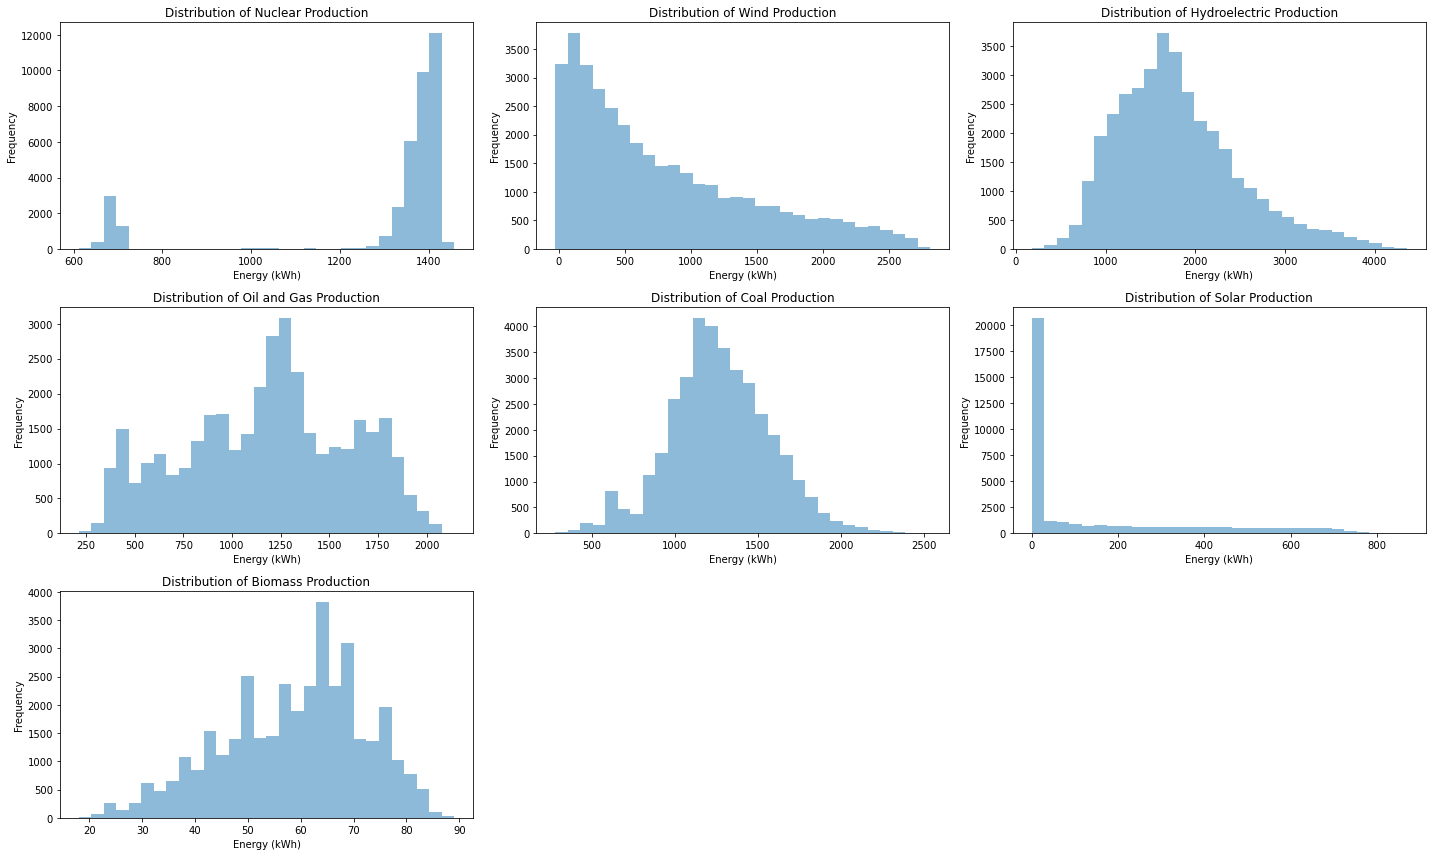

In [31]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass'.

plt.figure(figsize=(12, 6))

# List of production categories
production_categories = ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']

# Set the time as the x-axis
x = df.index

# Initialize a variable to keep track of the bottom values for stacking
bottom = None

# Loop through each production category and create a stacked bar
for category in production_categories:
    plt.bar(x, df[category], label=category, alpha=0.7, bottom=bottom)
    if bottom is None:
        bottom = df[category]
    else:
        bottom += df[category]

plt.xlabel('Time')
plt.ylabel('Energy (kWh)')
plt.legend()
plt.title('Hourly Electricity Production by Category Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
production_by_source = df[['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']].sum()
source_labels = production_by_source.index

plt.figure(figsize=(8, 10))
plt.pie(production_by_source, labels=source_labels, autopct='%1.1f%%', startangle=90)
plt.title('Energy Source Contributions to Total Production')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.show()


KeyboardInterrupt



Error in callback <function flush_figures at 0x7f8b13f96c10> (for post_execute):



KeyboardInterrupt



In [14]:
max_consumption_hour = df['Consumption'].idxmax()
max_production_hour = df[['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']].sum(axis=1).idxmax()

print(f"Hour of Peak Consumption: {max_consumption_hour}")
print(f"Hour of Peak Production: {max_production_hour}")

Hour of Peak Consumption: 17988
Hour of Peak Production: 35709


In [15]:
df['DayOfWeek'] = df.index.day_name()
average_daily_consumption = df.groupby('DayOfWeek')['Consumption'].mean()
average_daily_production = df.groupby('DayOfWeek')[['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']].mean()

plt.figure(figsize=(12, 6))
plt.plot(average_daily_consumption.index, average_daily_consumption, label='Average Consumption', marker='o')
plt.plot(average_daily_production.index, average_daily_production['Nuclear'], label='Average Nuclear Production', marker='o')
# Repeat for other production categories
plt.xlabel('Day of the Week')
plt.ylabel('Energy (kWh)')
plt.legend()
plt.title('Seasonal and Weekly Patterns')
plt.xticks(rotation=45)
plt.show()

AttributeError: 'RangeIndex' object has no attribute 'day_name'


KeyboardInterrupt



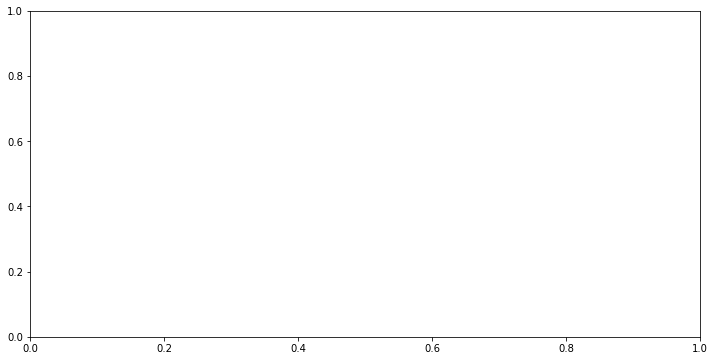

In [33]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass'.

production_categories = ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']

# Create a new figure
fig = plt.figure(figsize=(20, 12))

# Loop through each production category and create individual histograms
for i, category in enumerate(production_categories):
    # Create a subplot for the current category
    ax = fig.add_subplot(3, 3, i + 1)  # Assuming 3x3 grid for up to 9 categories
    
    # Plot the histogram for the current category
    ax.hist(df[category].dropna(), bins=30, alpha=0.5)
    
    # Set labels and title
    ax.set_xlabel('Energy (kWh)')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {category} Production')
    
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


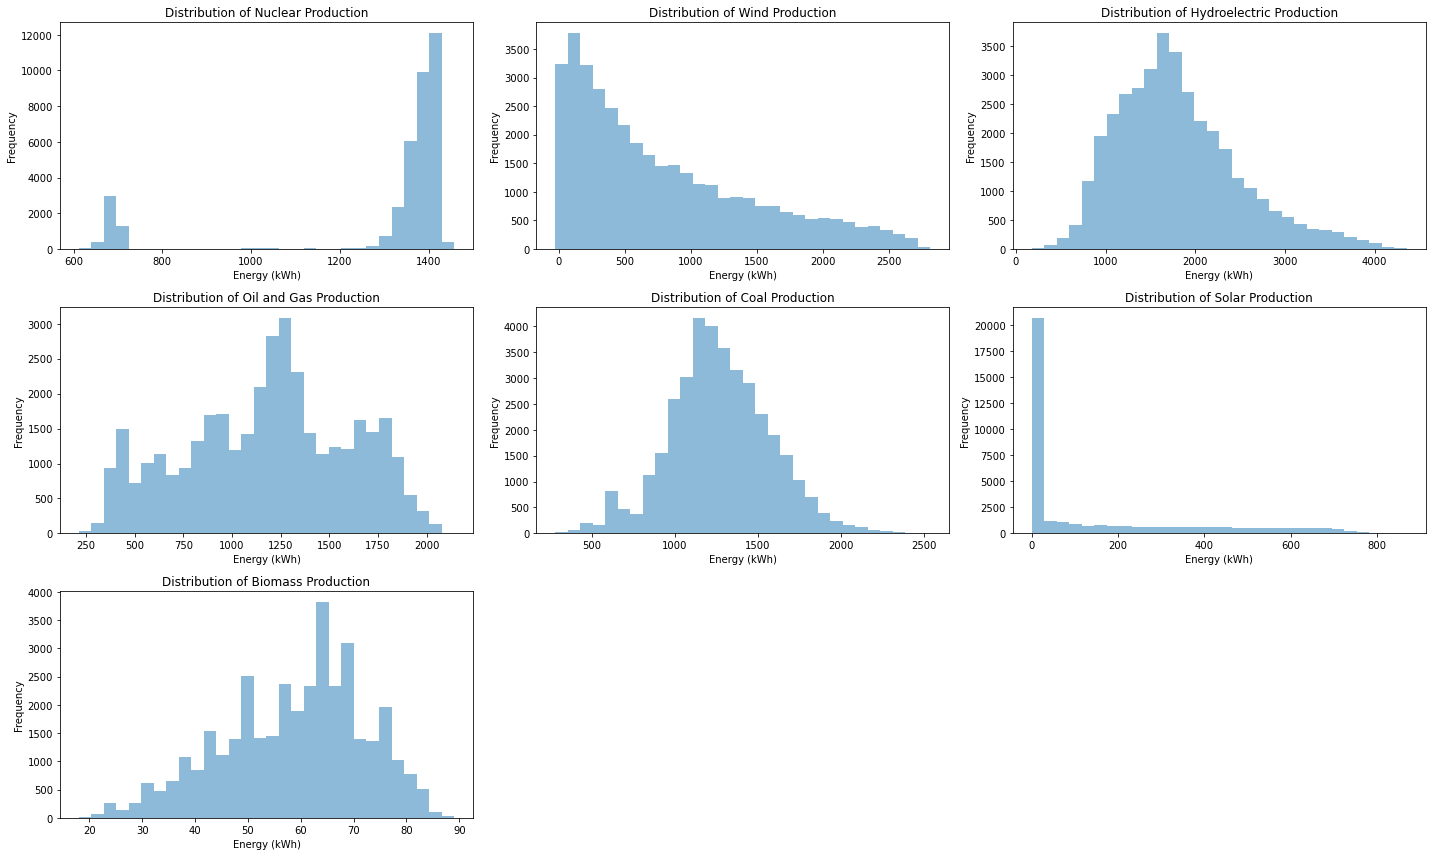

In [34]:
import pandas as pd

# Assuming you have a DataFrame named 'df'
# Display basic information about the DataFrame
print("DataFrame Info:")
print(df.info())

# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())

# Display count and unique values for categorical (non-numeric) columns
for column in df:
    print(f"\nColumn: {column}")
    print(f"Number of unique values: {df[column].nunique()}")
    print(f"Unique values: {df[column].unique()}")

In [37]:
import pandas as pd

# Load your dataset (assuming you have it loaded into a DataFrame named 'df')

# 1. Minimum and Maximum Values for Each Column
min_values = df.min()
max_values = df.max()

# 2. Average (Mean) Values for Each Column
average_values = df.mean()

# 3. Common Values (Mode) for Each Column
common_values = df.mode().iloc[0]

# 4. Percentage of Missing or Incomplete Values for Each Column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine the results into a summary DataFrame
summary_df = pd.DataFrame({
    'Minimum Value': min_values,
    'Maximum Value': max_values,
    'Average Value': average_values,
    'Common Value': common_values,
    'Missing Percentage': missing_percentage
})

# Sort the summary DataFrame by the missing percentage in descending order
summary_df = summary_df.sort_values(by='Missing Percentage', ascending=False)

# Display the top 10 most important pieces of information
top_10_info = summary_df.head(10)
print(top_10_info)


Summary Statistics for Numerical Columns:
        Consumption    Production       Nuclear          Wind  Hydroelectric  \
count  36772.000000  36772.000000  36772.000000  36772.000000   36772.000000   
mean    6707.924889   6543.770478   1293.468590    785.700723    1801.603149   
std     1034.961146   1005.486125    237.348752    681.508967     678.981785   
min     4081.000000   3315.000000    612.000000    -26.000000     175.000000   
25%     5895.750000   5833.000000   1349.000000    226.000000    1310.000000   
50%     6686.000000   6492.000000   1386.000000    577.000000    1708.000000   
75%     7434.000000   7210.000000   1409.000000   1195.250000    2184.000000   
max     9615.000000   9886.000000   1457.000000   2811.000000    4359.000000   

        Oil and Gas          Coal         Solar       Biomass  \
count  36772.000000  36772.000000  36772.000000  36772.000000   
mean    1181.630017   1270.038236    151.524094     58.730828   
std      422.487653    306.550193    222.

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass,Consumption_rolling_avg,Production_rolling_avg,Nuclear_rolling_avg,Wind_rolling_avg,Hydroelectric_rolling_avg,Oil and Gas_rolling_avg,Coal_rolling_avg,Solar_rolling_avg,Biomass_rolling_avg
DateTime,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30,6352.000000,6527.000000,1395.000000,79.000000,1383.000000,1896.000000,1744.000000,0.000000,30.000000
2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30,6234.000000,6114.000000,1394.000000,87.500000,1247.500000,1662.500000,1692.500000,0.000000,30.000000
2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30,6113.666667,5968.000000,1393.666667,105.666667,1175.000000,1596.666667,1667.000000,0.000000,30.000000
2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30,6005.750000,5876.750000,1394.500000,127.000000,1124.250000,1561.250000,1639.750000,0.000000,30.000000
2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30,5916.000000,5792.200000,1394.200000,133.400000,1091.400000,1539.800000,1603.400000,0.000000,30.000000
2019-01-01 05:00:00,5525,5385,1395,91,958,1455,1456,0,30,5850.833333,5724.333333,1394.333333,126.333333,1069.166667,1525.666667,1578.833333,0.000000,30.000000
2019-01-01 06:00:00,5513,5349,1392,98,938,1451,1440,0,31,5802.571429,5670.714286,1394.000000,122.285714,1050.428571,1515.000000,1559.000000,0.000000,30.142857
2019-01-01 07:00:00,5524,5547,1392,93,1187,1446,1394,0,34,5767.750000,5655.250000,1393.750000,118.625000,1067.500000,1506.375000,1538.375000,0.000000,30.625000
2019-01-01 08:00:00,5510,5471,1391,51,1325,1357,1303,8,34,5739.111111,5634.777778,1393.444444,111.111111,1096.111111,1489.777778,1512.222222,0.888889,31.000000
